# Project: Predicting Boston Housing Prices
## Model Evaluation & Validation

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.


## Getting Started
First, let's import the necessary libraries for this project and load the data from the file

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, we will make a cursory investigation about the Boston housing data and provide our observations. Familiarizing ourselves with the data through an explorative process is always a good thing to do because it helps us better understand and justify our results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, we will calculate descriptive statistics about the Boston housing prices. 
We will use `numpy` to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

minimum_price = np.amin(prices.values)
maximum_price = np.amax(prices.values)
mean_price = np.mean(prices.values)
median_price = np.median(prices.values)
std_price = np.std(prices.values)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Using our intuition, for each of the three features above, we will make a guess whether the increase in the value of that feature would lead to an increase in the value of `MDEV` or a decrease in the value of `MDEV`.

The first one to consider is 'RM' - the average number of rooms among homes in the neighborhood. If the 'RM' is increased, that means that the houses have more rooms, and they are bigger. That would lead to the increase of the price 'MDEV' - bigger houses cost more.
Increase in 'RM' -> Increase in 'MDEV'


'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class". If the 'LSTAT' is bigger, that means that we live in poorer neighborhood. So, the increase in the 'LSTAT' feature would lead to decrease of 'MDEV' feature, because if we live in the poor neighborhood, the prices are lower. If we live in the high class neighborhood, the prices would be higher.
Increase in 'RM' -> Decrease in 'MDEV'

'PTRATIO' feature is the ratio of students to teachers in primary and secondary schools in the neighborhood. If the ratio is lesser, that means that we have close number of teachers and students. That could mean that either there are lots of teachers, or not many students. That means that the teacher could dedicate more time to a single student, meaning that the education quality will be better.
Increase in 'PTRATIO' -> Decrease in 'MDEV'

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

In [3]:
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    score = r2_score(y_true, y_predict)
    return score

### Goodness of Fit
Now let's try running our performance_metric function on a few data points to see this model's coefficient of determination.

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [4]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


This model has as coefficient of determination R^2 = 0.923
We know that if the R^2 = 0, the feature cannot be prediced at all, and if the R^2 = 1, it means that the feature is fully predicted. 
Thus, this means that our feature can be predicted 92,3% of the time, which is pretty good score.

### Implementation: Shuffle and Split Data
Our next implementation requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [5]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=40)

print "Training and testing split was successful."

Training and testing split was successful.


### Training and Testing
When splitting our data into train and test subsets, we can play and see the performance of our learning algorithm. We can observe learning curves and see how does the algorithm performs as the train test size grows, and we can see if the model has high bias or high variance. Also, if we want to use most of the data in both train and test subsets, we can use K-fold cross validation which will split data into training and testing sets K times, and then take the average of the performance. If we do not have a way to test our model - we obviously cannot see if the model is performing well, we could have e.g. high bias without knowing that, and that would result in a poor performance.

----

## Analyzing Model Performance
In this third section of the project, we will take a look at several models' learning and testing performances on various subsets of training data. Additionally, we will investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

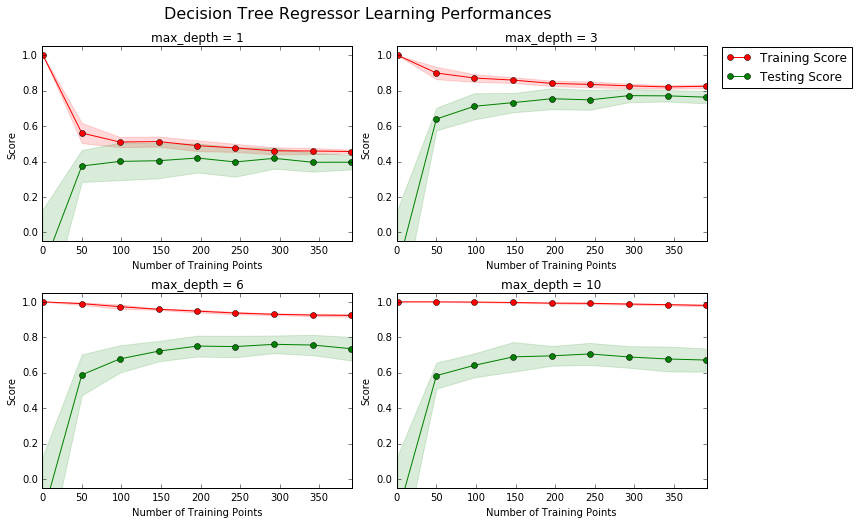

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data
Let's pick a graph with max_depth = 10. We can see that the training score is pretty consistent here, so the algorithm has learned what it needs to learn. However, testing score curve is a different story. It starts to learn, and the curve starts to get closer to training score curve. However, after cca. 200 training points, the testing score curve starts to drop. This results in a high variance error. That means that at max_depth=10 we have almost perfect training score, but the model is too adjusted to the training score. It is too specific and the variance is high, resulting in bad prediction. There is a large gap between training and testing curves. This could be fixed by either decreasing the complexity of the model, or providing lots more data.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

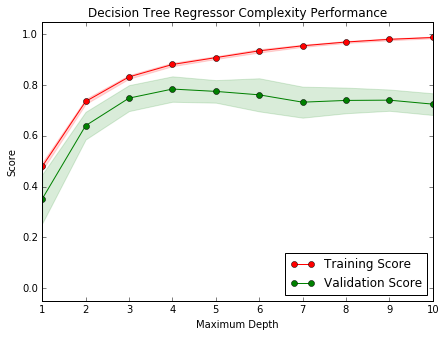

In [8]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, our model will suffer from high bias. We have low accuracy in prediction (underfitting). We can see that our training score is very low, and our validation score is even lower. 
If we take a look at graph where maximum depth is 10, we can see that as the depth increases, our training score is becoming better, however, our validation score is becoming further from the training score. We know that if there is a large gap between training and testing error, the model suffers from high variance. 

### Best-Guess Optimal Model
Intuitively, max_depth=4 gives us the best performance. Because we can see that when max_depth=1, obviously the model is not trained enough, so it cannot be predicted properly. As we increase max_depth, we can see that both training and validation scores are raising. And when max_depth passes 4, the gap is starting to form between training and validation scores, and as the depth increases the gap becomes larger and larger.

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search
Grid search technique is technique of combining different parameter tunes, and cross-validating them to see which tune gives the best performance. GridSearchCV is integrated in sklearn, and we use it to find the best performance without having to guess the different parameters and manually tune them. It is basically generating grid of combinations, and then it goes through them and cross validates them, in order to find the combination of tuned parameters which gives the best score.

### Cross-Validation
When having a train test split, we are splitting our dataset into two subsets - training and testing. And we are doing it only once. We can say what percent of the data will fall into training, and what percent will fall into testing subset. But the problem is that we are not using the whole data to train the algorithm, and we are not using all the data to test the algorithm. So there might be a case which is not covered in training subset, but it exists in testing subset. And then we did not train our algorithm for that case, and it can give us bad prediction score. In order to avoid this, we can use K-fold cross validation training technique. When using K-fold, we are splitting our data in K number of subsets. And then we are running through iterations -
We take i-th subset for testing, and other subsets for training. We train the algorithm and then test it. And we repeat the process untill all the subsets are used for testing. In the end we take the average. That way we used all the subsets for training and all subsets for testing. That results in a better prediction performance.

### Implementation: Fitting a Model
Our final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In [9]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit( X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0 )

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = { 'max_depth': range(1,11) }

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model

Let's run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices
Let's imagine that we were a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. We have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,096.00
Predicted selling price for Client 2's home: $219,961.54
Predicted selling price for Client 3's home: $955,500.00


Predicted selling price for Client 1's home: $411,096.00

Given that the Client 1's home has 5 rooms, 17 percent poverty rate and 15 to 1 student-teacher ratio its price is reasonable. Price is near the average price for the home ( average price - $454,342.94 )

Predicted selling price for Client 2's home: $219,961.54

Client 2's home has 4 rooms, higher poverty level than Client 1's home, and 22-to-1 student-teacher ratio. So the price for it is less than Client 1's. This price is below average.

Predicted selling price for Client 3's home: $955,500.00

Client 3's home has most rooms of those three homes (8 rooms), really low neighborhood poverty level (only 3%, meaning that the home is in high class area) and 12-to-1 student-teacher ratio. Thus, its home is the most expensive. The price is way above average, pretty close to the maximum price of the house

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Let's run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability
The data that was collected from 1978 can be relevant today in some aspects of it, but not fully relevant.
The housing prices might vary as the time goes, but they can still keep close to the original price.
However, in this data, we do not have enough features to fully describe a home. We have a few features that can be used to generally predict some house's price, but in the real world I would consider more features such as how many squared meters the house has. Whether it has pool or not, tennis court, how many flats it has, how close it is to the city centre etc. 
Our model currently ranges in prices for 28,652.84 dollars. 
Given that the pricing goes up to 1 million dollars, I would consider this model consistent, but not to the level that I would guarrantee 100% accurate price prediction because still cca. 28k dollars is a reasonable variation to consider. Data collected in an urban city should be used to create a predicting model for urban city. Data collected in a rural city should be used to create a predicting model in a rural city. The money standard can be different in urban and rural areas, as well as some other features that are considered when determining the price. For example in rural areas, if the house has farm next to it, it should be more expensive, whereas in urban areas, if the house has pool, it should be more expensive. We can see the difference between the features.